Check details

In [ ]:
!nvidia-smi

Tue Aug  6 01:25:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics


```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
ROOT_PATH = "/content/drive/MyDrive/cell_segmentation"

In [23]:
!pwd

/content/drive/My Drive/cell_segmentation


In [24]:
%cd "/content/drive/MyDrive/cell_segmentation"

/content/drive/MyDrive/cell_segmentation


In [25]:
!pwd

/content/drive/MyDrive/cell_segmentation


In [26]:
!ls

cell_data	     data.yaml	yolov8_instance_segmentation_on_custom_dataset.ipynb
cell_data_check.zip  runs	yolov8s-seg.pt


## Custom Training

In [27]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=20 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=F

In [29]:
!ls runs/segment/train/

args.yaml					    MaskP_curve.png    train_batch12.jpg
BoxF1_curve.png					    MaskPR_curve.png   train_batch1.jpg
BoxP_curve.png					    MaskR_curve.png    train_batch2.jpg
BoxPR_curve.png					    results.csv        val_batch0_labels.jpg
BoxR_curve.png					    results.png        val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg   weights
events.out.tfevents.1722908203.25c9122d1ad6.3410.0  train_batch10.jpg
MaskF1_curve.png				    train_batch11.jpg


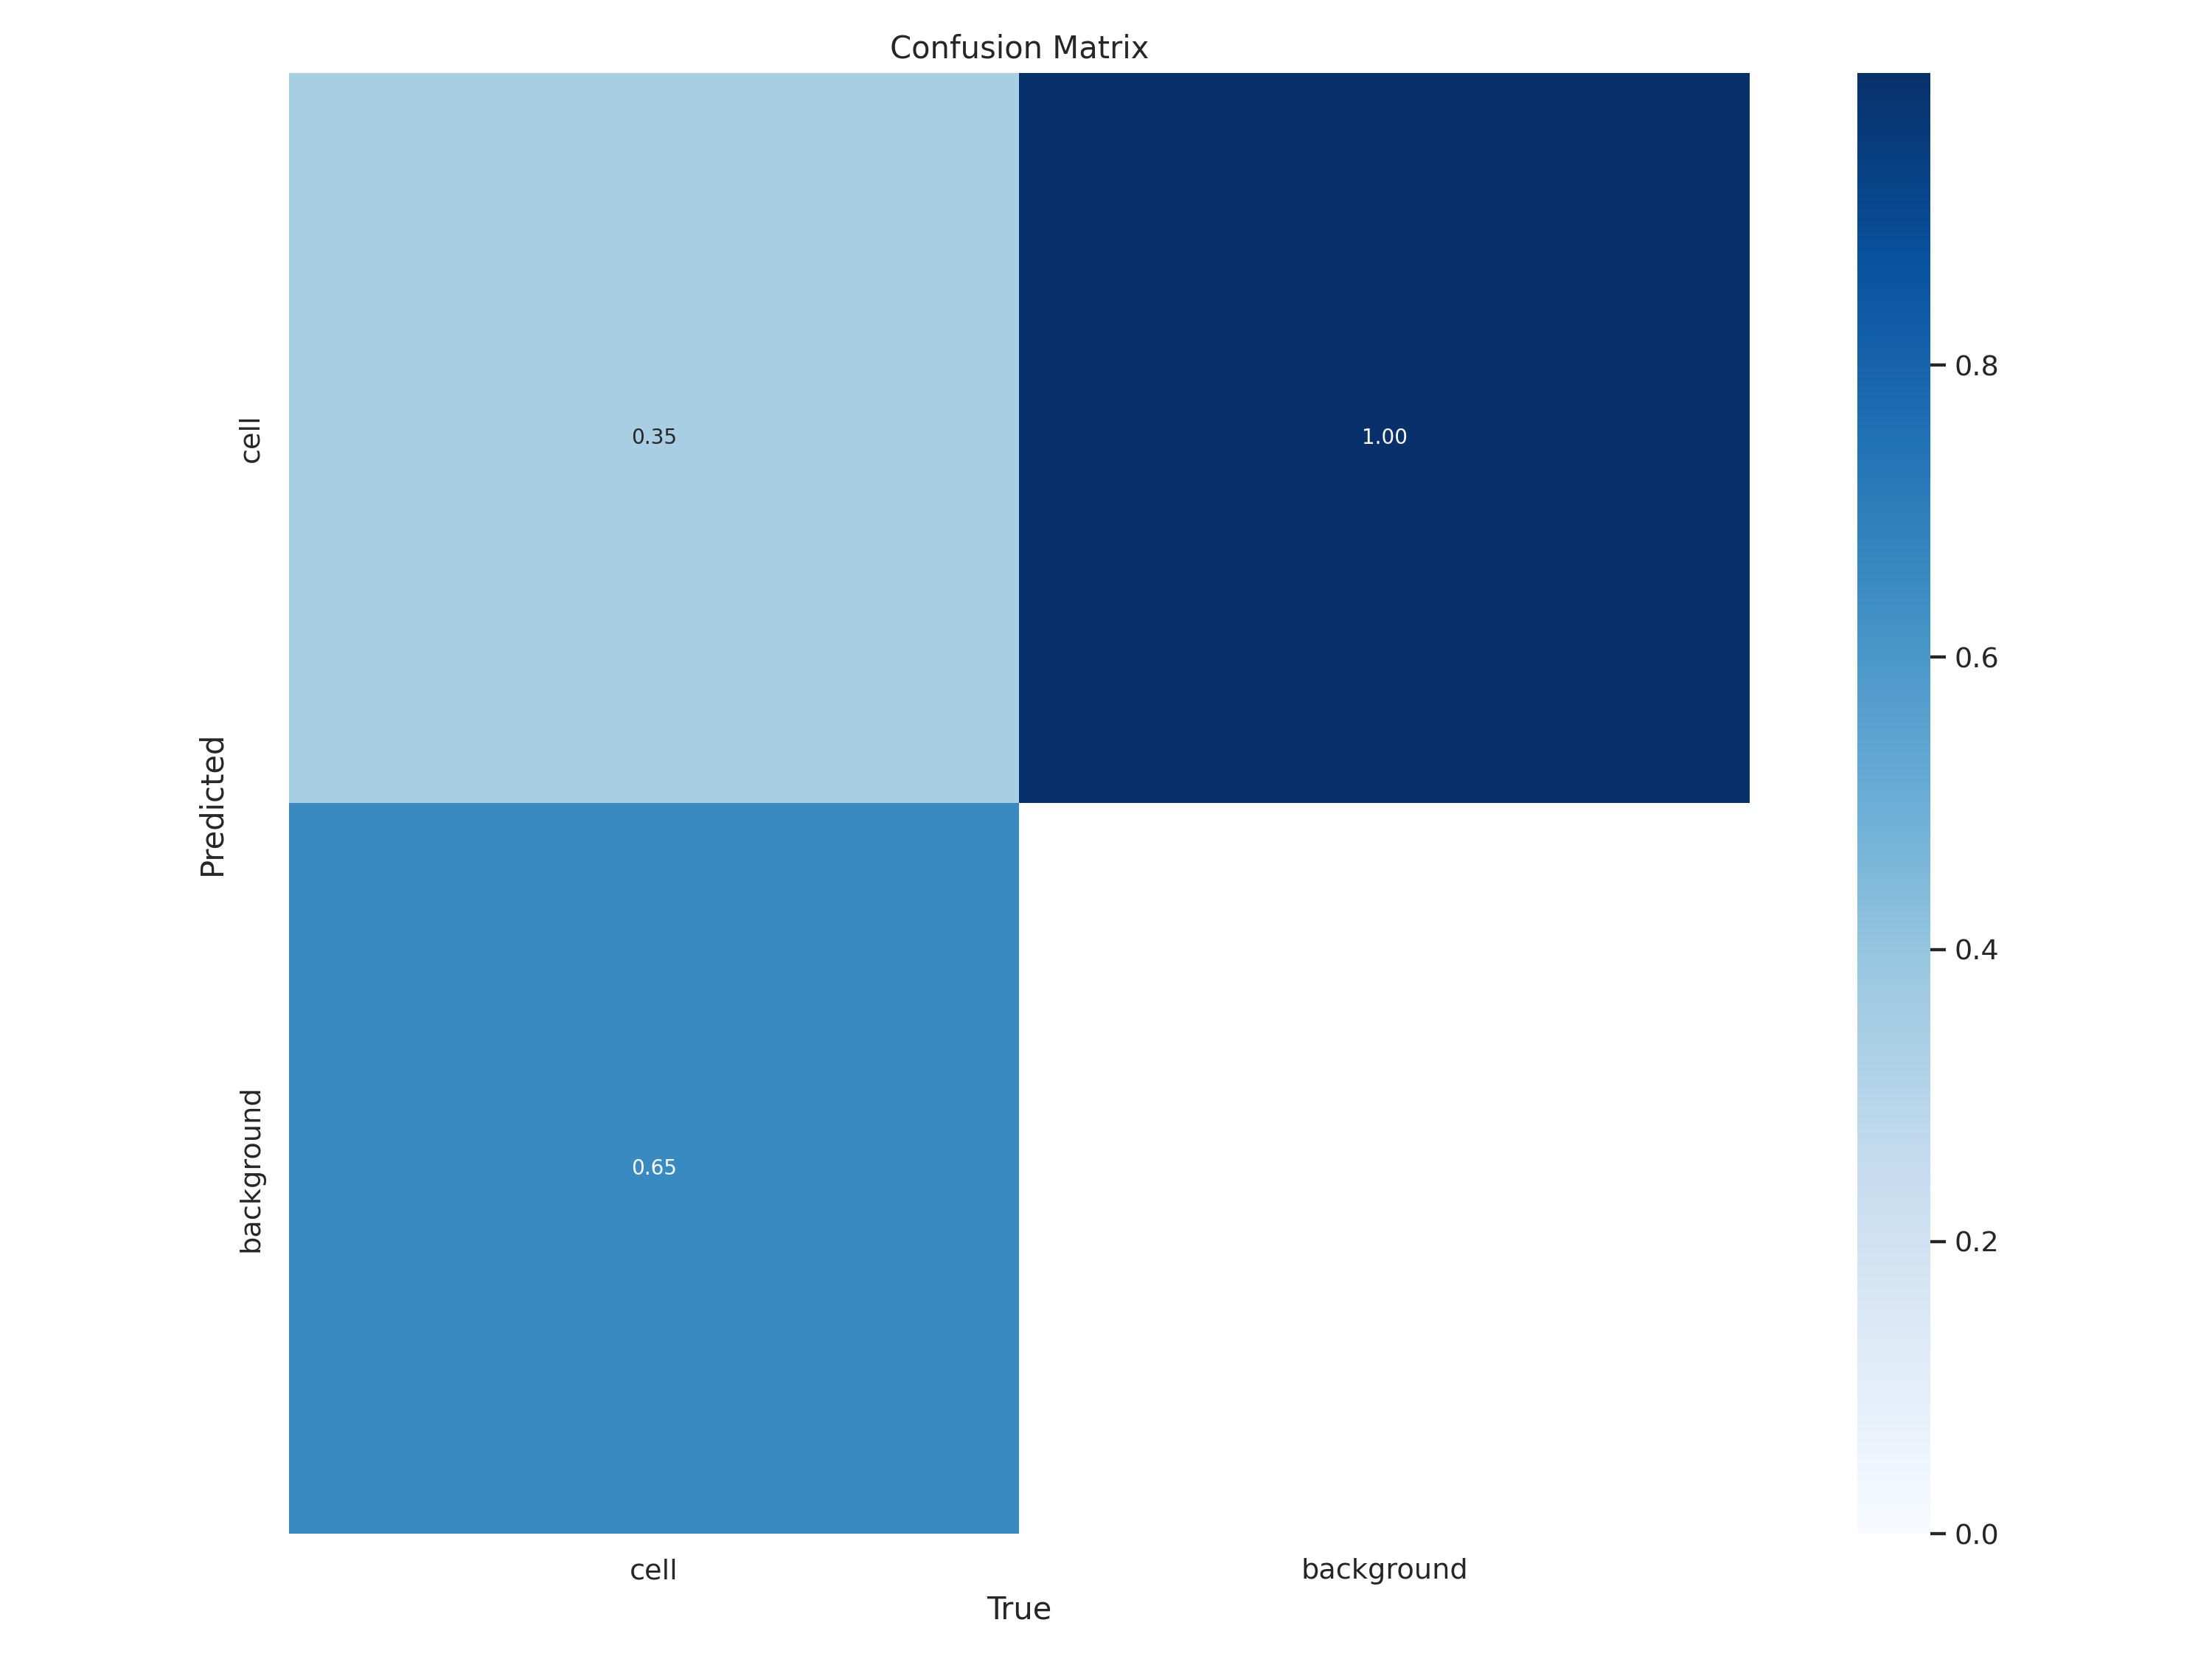

In [30]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

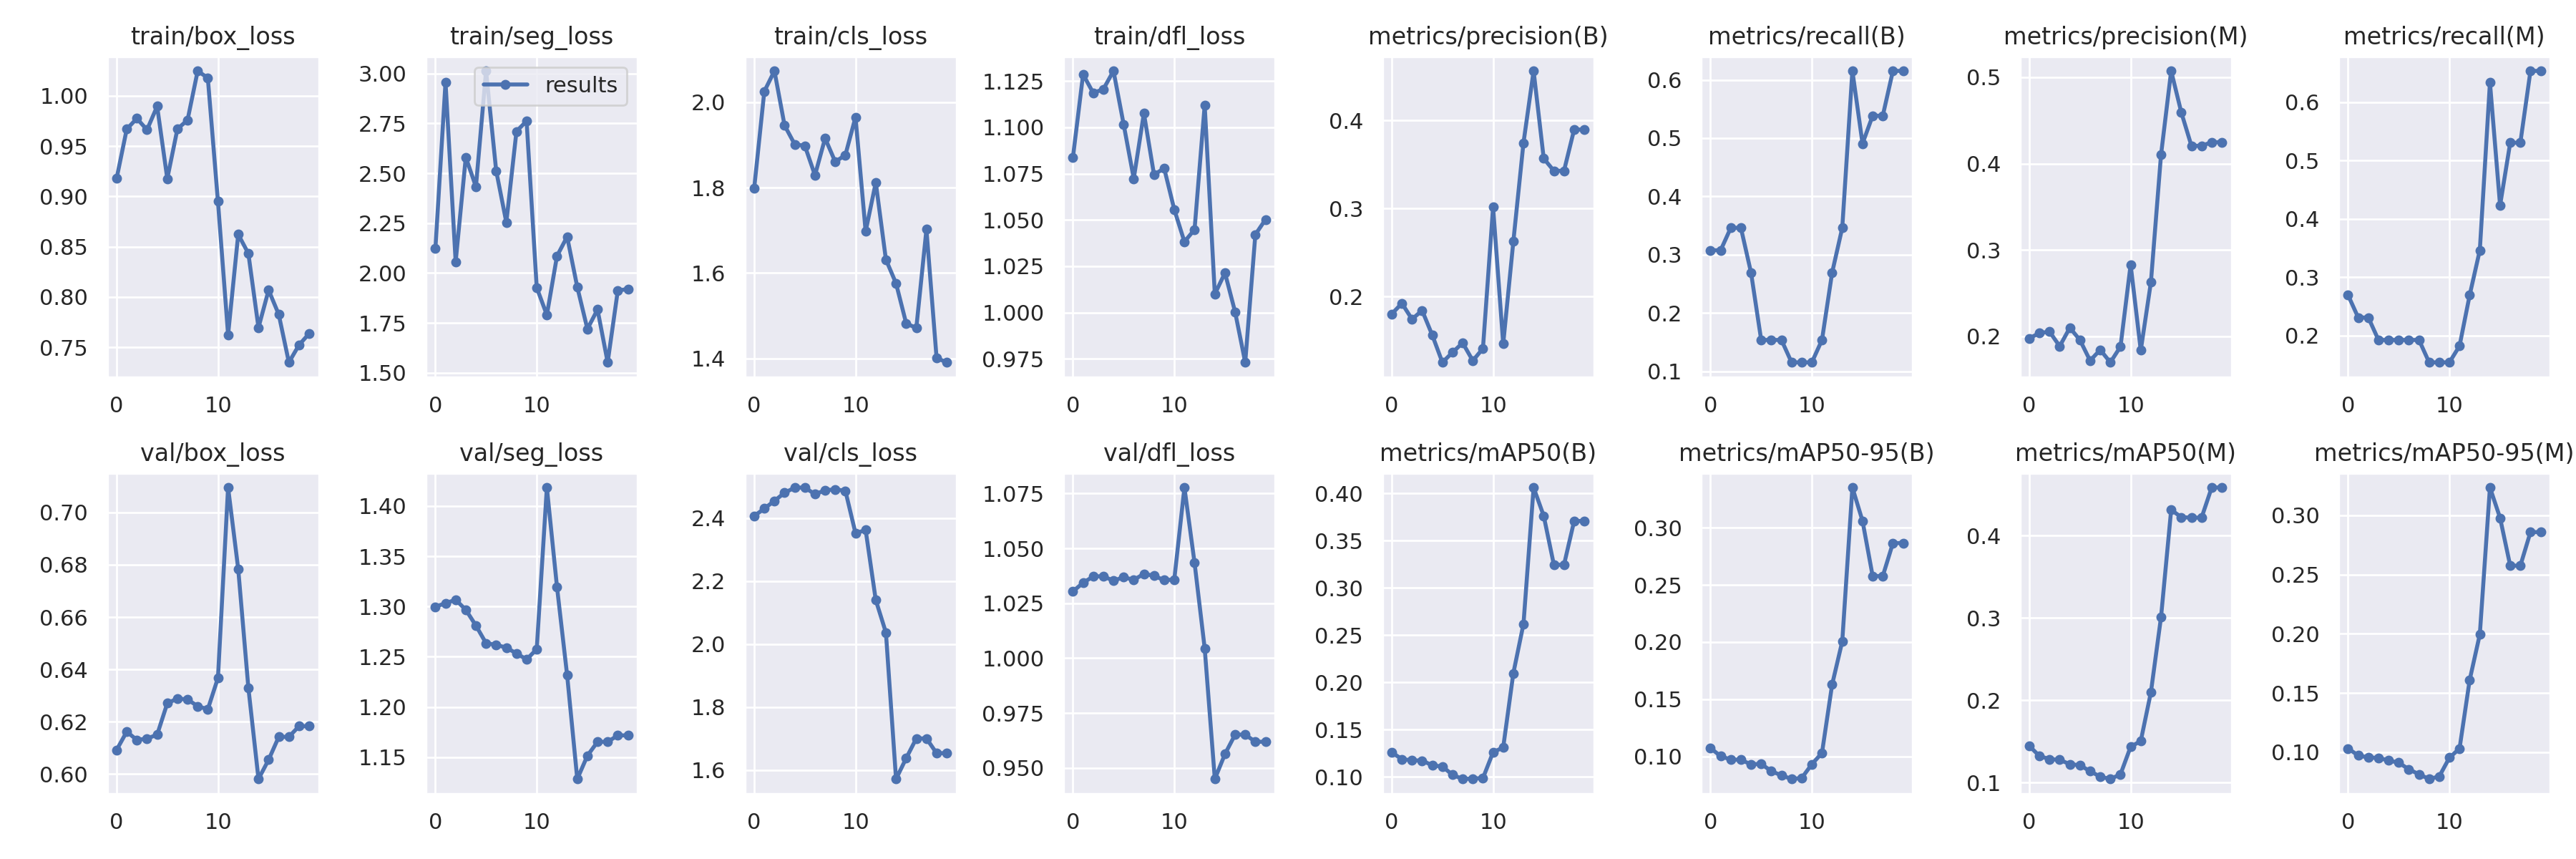

In [31]:
Image(filename=f'runs/segment/train/results.png', width=600)

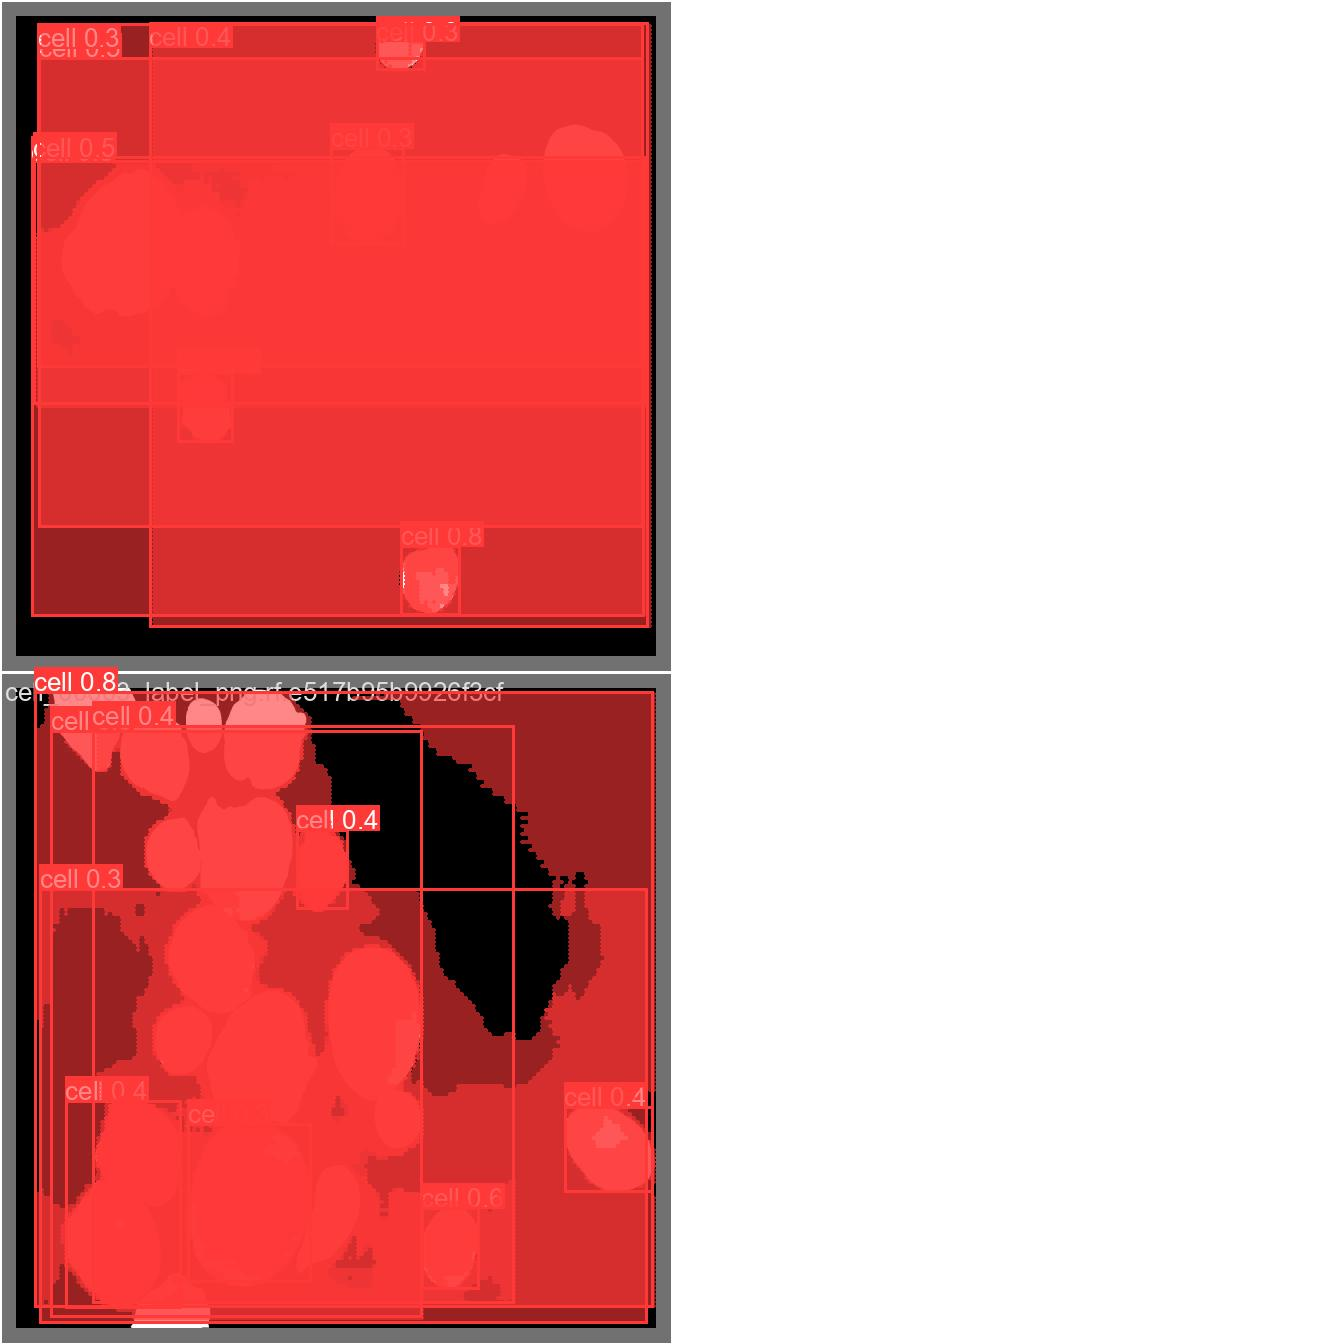

In [32]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [33]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2024-08-06 01:41:14.446041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 01:41:14.466680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 01:41:14.473152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 01:41:14.488236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 01:41:15.891754: W tensorflow/comp

## Inference with Custom Model

In [34]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/test/images save=true

2024-08-06 01:41:36.240704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 01:41:36.260576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 01:41:36.266732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 01:41:36.281161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 01:41:37.555331: W tensorflow/comp

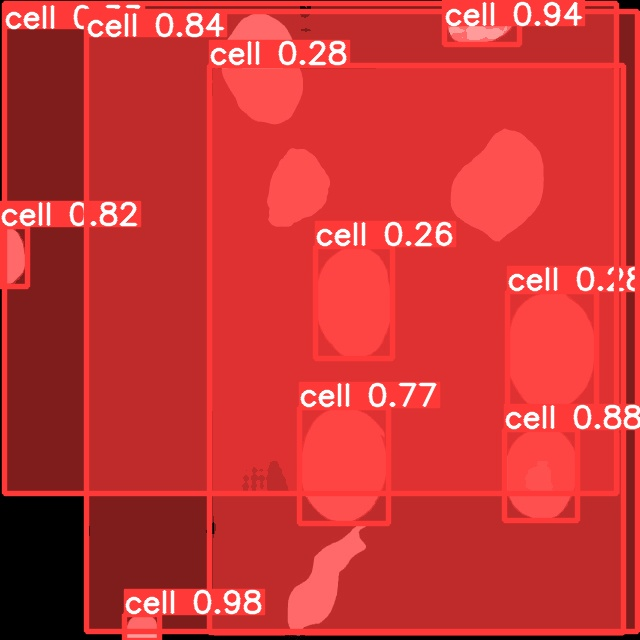

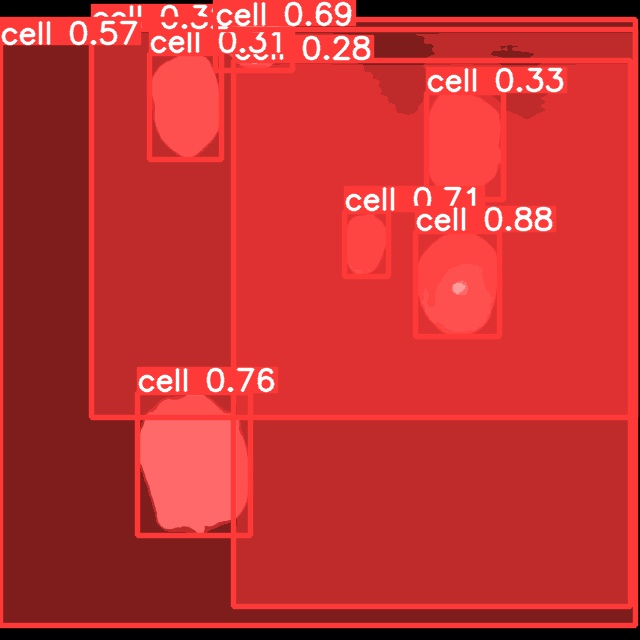

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")